# Wine Quality Data Set Regression Analysis - Bhavishey Thapar

###Download and unzip data

In [4]:
!wget https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip wine+quality.zip

--2023-11-29 05:47:28--  https://archive.ics.uci.edu/static/public/186/wine+quality.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine+quality.zip’

wine+quality.zip        [ <=>                ]  89.21K  --.-KB/s    in 0.1s    

2023-11-29 05:47:29 (611 KB/s) - ‘wine+quality.zip’ saved [91353]

Archive:  wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       


### Install required libraries

In [5]:
!pip install -q pycaret

In [6]:
import pycaret
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from pycaret.regression import *
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

#### As seen below the dataset contains 12 columns out which the 11th column (alcohol) is set to be the output of the ML algorithm.

In [7]:
# Load data and view the first few values
data=pd.read_csv("winequality-white.csv",delimiter=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### All the columns in the dataset are numerical so there is no need to use one hot encoding and there are no null values.

In [8]:
# Describe the dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
# No null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### The heat map of correlation below shows that the wine alcohol content is most strongly (negatively) related to the wine density. It is least related to volatile acidity, citric acid and sulphates columns. So these columns will be removed.

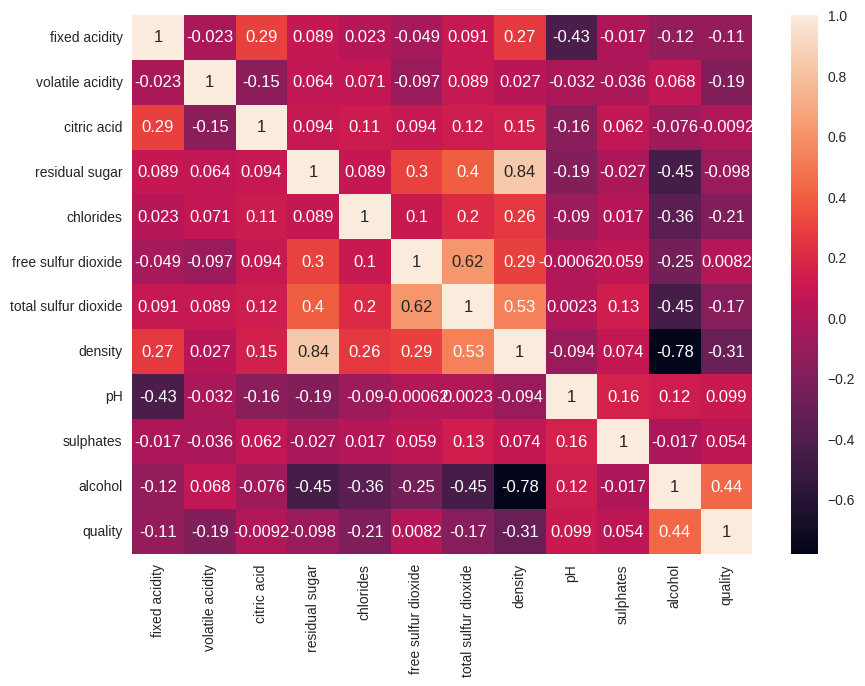

In [10]:
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(data.corr() , annot = True , ax = ax)
plt.show()

In [11]:
del data['volatile acidity']
del data['citric acid']
del data['sulphates']

In [12]:
data.head()

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,quality
0,7.0,20.7,0.045,45.0,170.0,1.0010,3.00,8.8,6
1,6.3,1.6,0.049,14.0,132.0,0.9940,3.30,9.5,6
2,8.1,6.9,0.050,30.0,97.0,0.9951,3.26,10.1,6
3,7.2,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6
4,7.2,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6


#### The plot of Wine Quality vs. Alcohol Content shows the lienar correlation between the two.

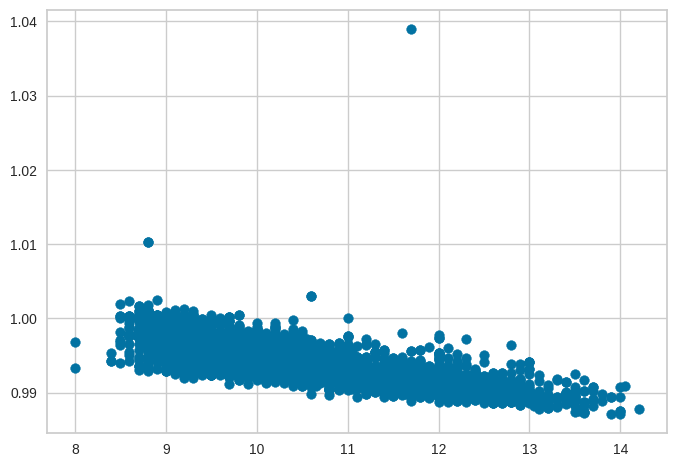

In [13]:
plt.scatter(x=data['alcohol'],y=data['density'])

## PyCaret Analysis

In [14]:
s = setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 9)"
4,Transformed data shape,"(4898, 9)"
5,Transformed train set shape,"(3428, 9)"
6,Transformed test set shape,"(1470, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [15]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.2438,0.1230,0.3498,0.9175,0.0301,0.0230,0.1100
lightgbm,Light Gradient Boosting Machine,0.2598,0.1244,0.3515,0.9165,0.0303,0.0247,0.6840
rf,Random Forest Regressor,0.2499,0.1290,0.3578,0.9135,0.0307,0.0236,0.8090
et,Extra Trees Regressor,0.2303,0.1303,0.3594,0.9125,0.0309,0.0217,0.4870
gbr,Gradient Boosting Regressor,0.3066,0.1634,0.4034,0.8903,0.0350,0.0293,0.2620
dt,Decision Tree Regressor,0.3137,0.2498,0.4986,0.8320,0.0429,0.0295,0.0500
lr,Linear Regression,0.3135,0.2586,0.4681,0.8215,0.0364,0.0301,0.7830
lar,Least Angle Regression,0.3136,0.2586,0.4682,0.8215,0.0364,0.0301,0.0370
br,Bayesian Ridge,0.3137,0.2586,0.4682,0.8215,0.0364,0.0301,0.0380
ada,AdaBoost Regressor,0.4822,0.3469,0.5889,0.7676,0.0521,0.0473,0.2300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

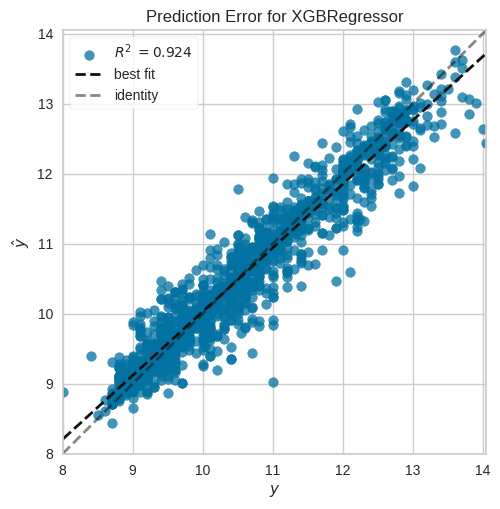

In [16]:
plot_model(best, plot = 'error')

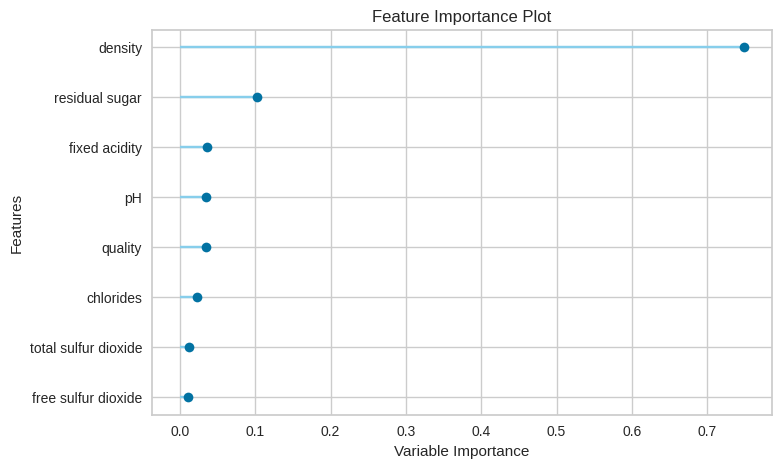

In [17]:
plot_model(best, plot = 'feature')

In [18]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.2339,0.1152,0.3394,0.9244,0.0290,0.0220


In [20]:
holdout_pred.head()

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,quality,alcohol,prediction_label
1088,7.4,16.950001,0.048,43.0,190.0,0.99950,3.03,6,9.2,9.196674
4366,5.9,3.200000,0.035,16.0,117.0,0.98959,3.26,6,12.6,12.918149
92,6.9,1.700000,0.035,47.0,136.0,0.99000,3.26,7,12.6,12.624092
2901,6.5,2.200000,0.028,36.0,92.0,0.99076,3.27,7,11.9,11.733120
2330,7.5,12.700000,0.050,25.0,209.0,0.99860,3.25,6,9.3,9.561281


## Neural Network Analysis

In [21]:
# Load data and view the first few values
data=pd.read_csv("winequality-white.csv",delimiter=";")
data.head()

data = sklearn.utils.shuffle(data)
del data['volatile acidity']
del data['citric acid']
del data['sulphates']

Y = data['alcohol']
data.drop(columns=['alcohol'], inplace=True)
data.head()

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,quality
1088,7.4,16.95,0.048,43.0,190.0,0.99950,3.03,6
4366,5.9,3.20,0.035,16.0,117.0,0.98959,3.26,6
92,6.9,1.70,0.035,47.0,136.0,0.99000,3.26,7
2901,6.5,2.20,0.028,36.0,92.0,0.99076,3.27,7
2330,7.5,12.70,0.050,25.0,209.0,0.99860,3.25,6


In [22]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, Y, test_size=0.2, random_state=42)

In [23]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [25]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [26]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [27]:
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Mean Absolute Error: {mae}')

Test Mean Absolute Error: 0.26570478081703186


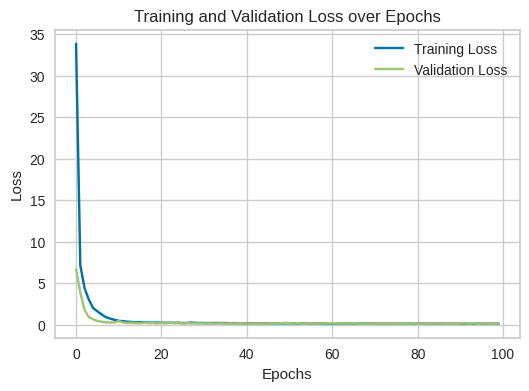

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
y_pred = model.predict(X_test_scaled, verbose=0)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9120550048227373
